# KDE Multivariado

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import make_normal_data
np.random.seed(123)
plt.style.use('seaborn-v0_8')

## Implementação do KDE Multidimensional

In [25]:
def kernel(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

def kde_multi(xi, data, h):
    diff = (xi - data) / h
    kernel_values = kernel(diff)
    product = np.prod(kernel_values, axis=1)
    
    pxi = np.sum(product) / (len(data) * h**data.shape[1])
    return pxi

## Gerando dados sintéticos 2D

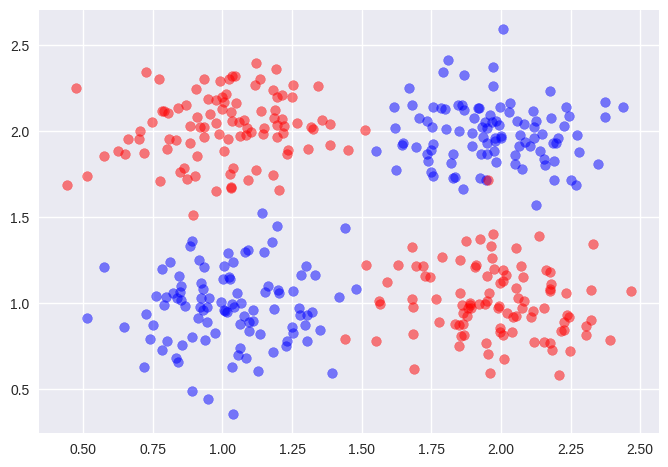

In [26]:
s = 0.2
n = 100
dim = 2
x1, y1 = make_normal_data(s = s, n = n, c = np.array([1, 1]), dim = 2, label = 1)
x2, y2 = make_normal_data(s = s, n = n, c = np.array([2, 2]), dim = 2, label = 1)
x3, y3 = make_normal_data(s = s, n = n, c = np.array([1, 2]), dim = 2, label = -1)
x4, y4 = make_normal_data(s = s, n = n, c = np.array([2, 1]), dim = 2, label = -1)
colors = ['blue', 'blue', 'red', 'red']
for x, y, colors in zip([x1, x2, x3, x4], [y1, y2, y3, y4], colors):
    plt.scatter(x[:, 0], x[:, 1], c = colors, alpha= 0.5)

xc1 = np.vstack((x1, x2))
xc2 = np.vstack((x3, x4))
nc1 = len(xc1)
nc2 = len(xc2)
yall = np.concatenate((y1, y2, y3, y4))

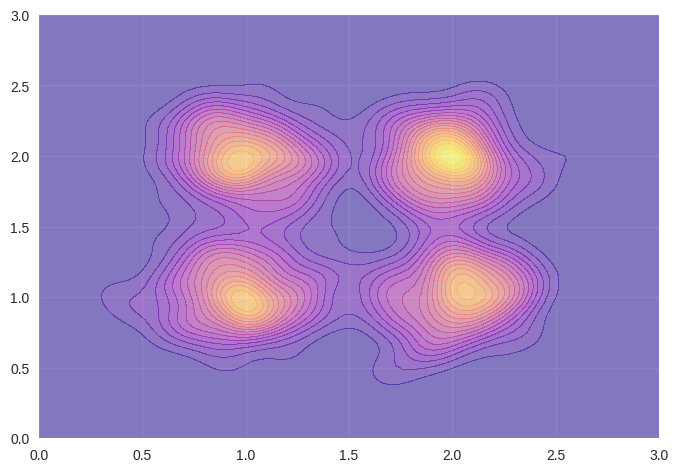

In [27]:
xall = np.vstack((x1, x2, x3, x4))
h = 0.1
xseq = np.linspace(0, 3, 100)
yseq = np.linspace(0, 3, 100)
M1 = np.zeros((len(xseq), len(yseq)))
for i in range(len(xseq)):
    for j in range(len(yseq)):
        M1[i][j] = kde_multi(np.array([xseq[i], yseq[j]]), xall, h)

plt.contourf(xseq, yseq, M1, levels=20, cmap='plasma', alpha=0.5)

## Visualizando as projeções das probabilidades a priori

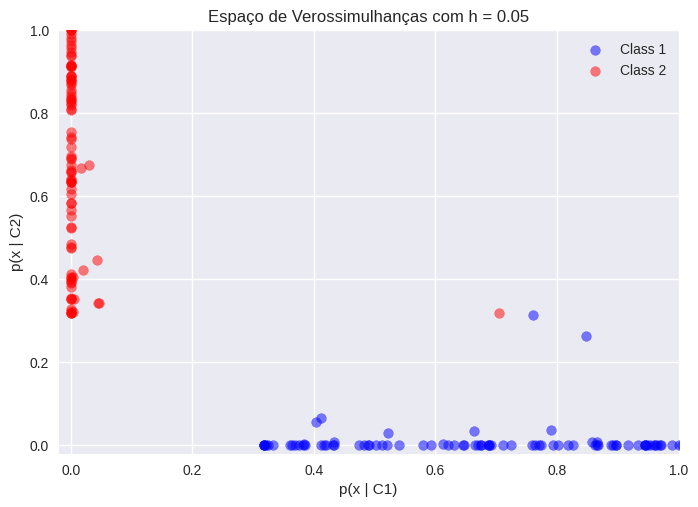

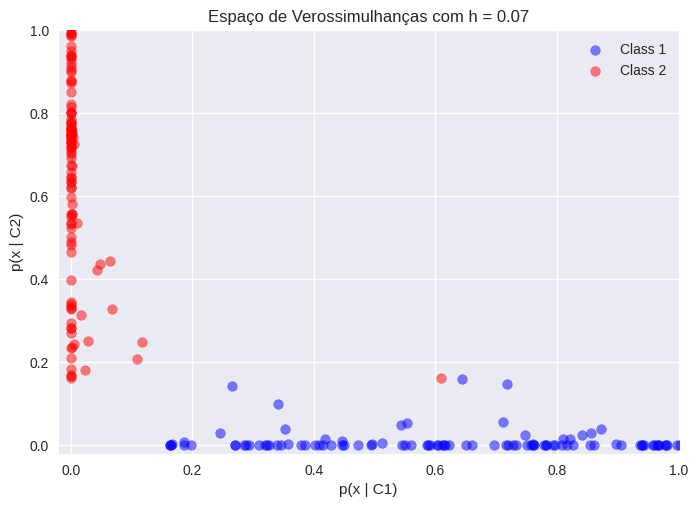

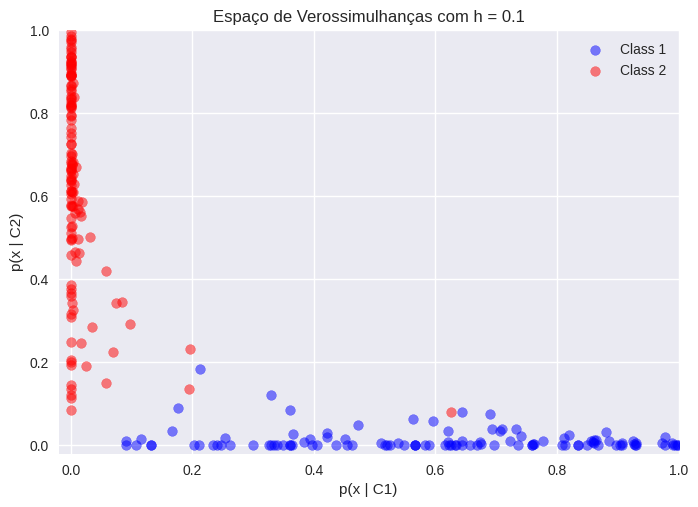

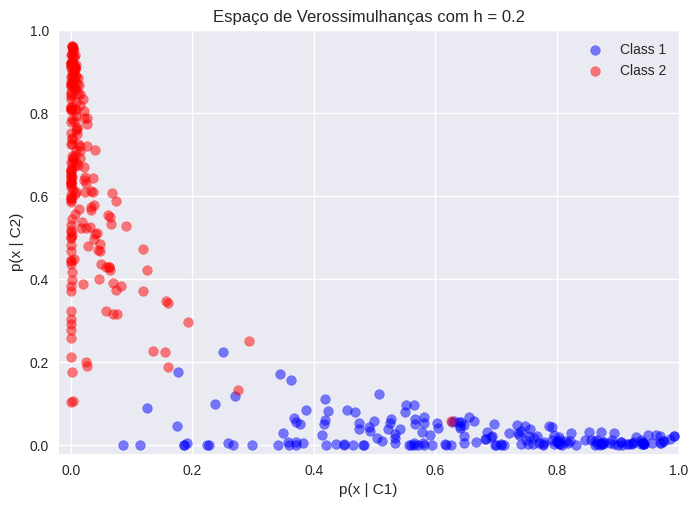

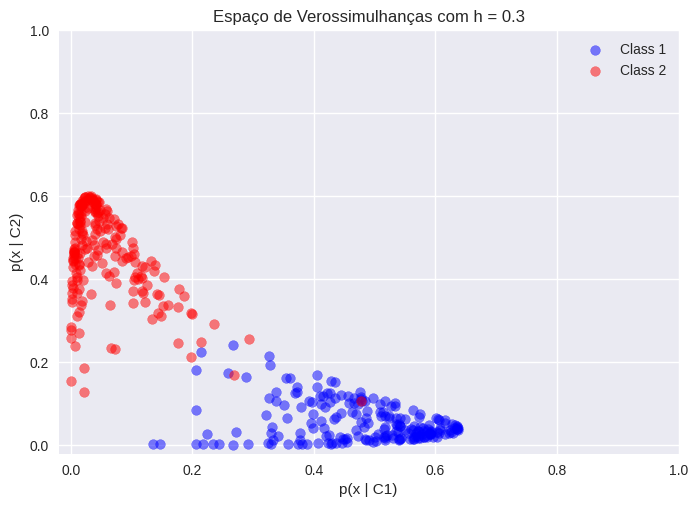

<Figure size 800x550 with 0 Axes>

In [28]:
import time
hlist = [0.05, 0.07, 0.1, 0.2, 0.3]
colors = ['blue', 'red']
plt.ion()
pxc1 = np.zeros((len(xall)))
pxc2 = np.zeros((len(xall)))
for ch, h in enumerate(hlist):
    for i in range(len(xall)):
        pxc1[i] = kde_multi(xall[i], xc1, h)
        pxc2[i] = kde_multi(xall[i], xc2, h)

    plt.scatter(pxc1[yall == 1], pxc2[yall == 1], c = colors[0], alpha= 0.5, label = 'Class 1')
    plt.scatter(pxc1[yall == -1], pxc2[yall == -1], c = colors[1], alpha= 0.5, label = 'Class 2')
    plt.xlabel('p(x | C1)')
    plt.ylabel('p(x | C2)')
    plt.title(f'Espaço de Verossimulhanças com h = {h}')
    plt.xlim(-0.02, 1)
    plt.ylim(-0.02, 1)
    plt.legend()
    plt.show()
    time.sleep(1)
    plt.clf()

In [29]:
hseq = np.linspace(0, 0.3, 50)
acc_tr = np.zeros((len(hseq)))

for ch, h in enumerate(hseq):
    pxc1 = np.zeros(len(xall))
    pxc2 = np.zeros(len(xall))
    yhat_tr = np.zeros(len(xall))  # zera a cada h

    for i in range(len(xall)):
        pxc1[i] = kde_multi(xall[i], xc1, h)
        pxc2[i] = kde_multi(xall[i], xc2, h)
        
        # Para evitar divisão por zero:
        if pxc2[i] == 0 and pxc1[i] == 0:
            yhat_tr[i] = 1  # ou algum valor neutro
        elif pxc2[i] == 0:
            yhat_tr[i] = -1
        else:
            yhat_tr[i] = 1 if (pxc1[i]/pxc2[i]) > 1 else -1
    acc_tr[ch] = np.sum(yhat_tr == yall) / len(xall)

/tmp/ipykernel_28550/455748403.py:5: RuntimeWarning: divide by zero encountered in divide
  diff = (xi - data) / h
/tmp/ipykernel_28550/455748403.py:5: RuntimeWarning: invalid value encountered in divide
  diff = (xi - data) / h
/tmp/ipykernel_28550/455748403.py:9: RuntimeWarning: invalid value encountered in scalar divide
  pxi = np.sum(product) / (len(data) * h**data.shape[1])
/tmp/ipykernel_28550/2394203110.py:19: RuntimeWarning: overflow encountered in scalar divide
  yhat_tr[i] = 1 if (pxc1[i]/pxc2[i]) > 1 else -1


Melhor h: 0.024489795918367346


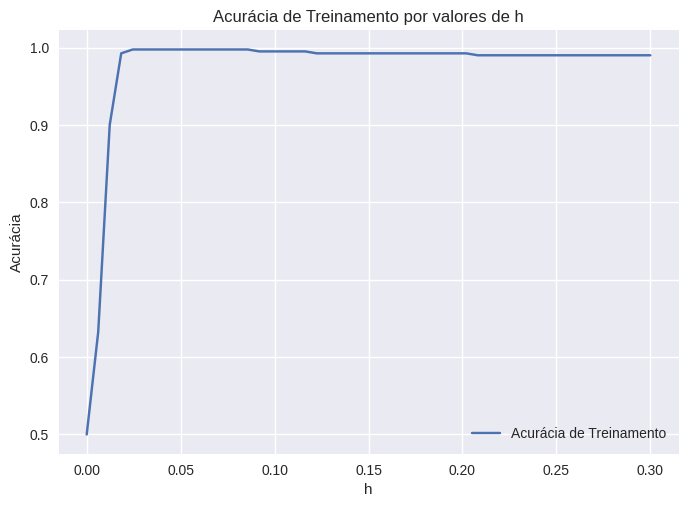

In [30]:
plt.plot(hseq, acc_tr, label='Acurácia de Treinamento')
plt.title('Acurácia de Treinamento por valores de h')
plt.xlabel('h')
plt.ylabel('Acurácia')
plt.legend()
print(f'Melhor h: {hseq[np.argmax(acc_tr)]}')

# Dataset PimaIndiansDiabetes

In [31]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name='diabetes', version=1, as_frame=True)
df = data.frame
df['class'] = df['class'].replace({
    'tested_positive': 1,
    'tested_negative': -1
})
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    int64   
 1   plas    768 non-null    int64   
 2   pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   insu    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   class   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB
None
   preg  plas  pres  skin  insu  mass   pedi  age class
0     6   148    72    35     0  33.6  0.627   50     1
1     1    85    66    29     0  26.6  0.351   31    -1
2     8   183    64     0     0  23.3  0.672   32     1
3     1    89    66    23    94  28.1  0.167   21    -1
4     0   137    40    35   168  43.1  2.288   33     1


/tmp/ipykernel_28550/3654898662.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({
/tmp/ipykernel_28550/3654898662.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['class'] = df['class'].replace({


In [32]:
X = df.drop('class', axis=1).to_numpy()  # Features matrix
y = df['class'].to_numpy()               # Labels vector

xc1 = X[y == 1]     # Features where class is +1
yc1 = y[y == 1]     # Labels where class is +1

xc2 = X[y == -1]    # Features where class is -1
yc2 = y[y == -1]    # Labels where class is -1
print(X.shape, y.shape)
print(xc1.shape, xc2.shape)

(768, 8) (768,)
(268, 8) (500, 8)


/tmp/ipykernel_28550/4039719877.py:17: RuntimeWarning: overflow encountered in scalar divide
  yhat[i] = 1 if (pxc1[i] / pxc2[i]) > (len(xc2) / len(xc1)) else -1


Melhor h: 1.0


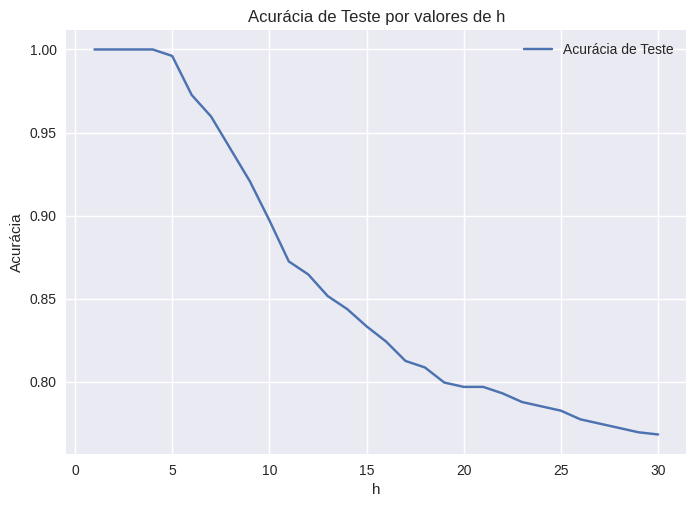

In [37]:
hseq = np.linspace(1, 30, 30)
acc = np.zeros((len(hseq)))

for ch, h in enumerate(hseq):
    # Compute KDE for training data
    pxc1 = np.array([kde_multi(x, xc1, h) for x in X])
    pxc2 = np.array([kde_multi(x, xc2, h) for x in X])

    # Predict labels for the test set
    yhat = np.zeros(len(X))
    for i in range(len(X)):
        if pxc2[i] == 0 and pxc1[i] == 0:
            yhat[i] = -1
        elif pxc2[i] == 0:
            yhat[i] = 1
        else:
            yhat[i] = 1 if (pxc1[i] / pxc2[i]) > (len(xc2) / len(xc1)) else -1

    # Compute accuracy on the test set
    acc[ch] = np.sum(yhat == y) / len(y)

plt.plot(hseq, acc, label='Acurácia de Teste')
plt.title('Acurácia de Teste por valores de h')
plt.xlabel('h')
plt.ylabel('Acurácia')
plt.legend()
h_best = hseq[np.argmax(acc)]
print(f'Melhor h: {h_best}')

/tmp/ipykernel_28550/2363894100.py:13: RuntimeWarning: overflow encountered in scalar divide
  yhat[i] = 1 if (pxc1[i] / pxc2[i]) > (len(X[y == -1]) / len(X[y == 1])) else -1


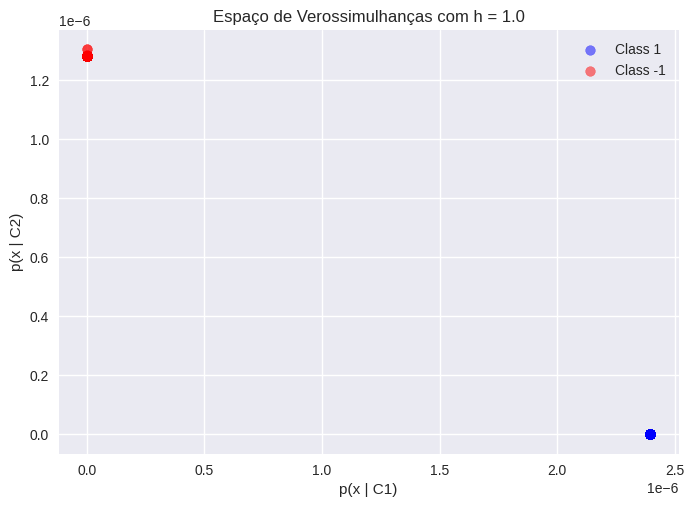

<Figure size 800x550 with 0 Axes>

In [38]:
# Compute KDE for training data
pxc1 = np.array([kde_multi(x, X[y == 1], h_best) for x in X])
pxc2 = np.array([kde_multi(x, X[y == -1], h_best) for x in X])

# Predict labels for the test set
yhat = np.zeros(len(X))
for i in range(len(X)):
    if pxc2[i] == 0 and pxc1[i] == 0:
        yhat[i] = -1
    elif pxc2[i] == 0:
        yhat[i] = 1
    else:
        yhat[i] = 1 if (pxc1[i] / pxc2[i]) > (len(X[y == -1]) / len(X[y == 1])) else -1

# Compute accuracy on the test set
acc = np.sum(yhat == y) / len(y)
# plt.scatter(pxc1, pxc2, c = 'blue', alpha= 0.5, label = 'Class 1')
plt.scatter(pxc1[y == 1], pxc2[y == 1], c = 'blue', alpha= 0.5, label = 'Class 1')
plt.scatter(pxc1[y == -1], pxc2[y == -1], c = 'red', alpha= 0.5, label = 'Class -1')
plt.xlabel('p(x | C1)')
plt.ylabel('p(x | C2)')
plt.title(f'Espaço de Verossimulhanças com h = {h_best}')
plt.legend()
plt.show()
plt.clf()

Text(0.5, 1.0, 'Matriz de Confusão - Diabetes')

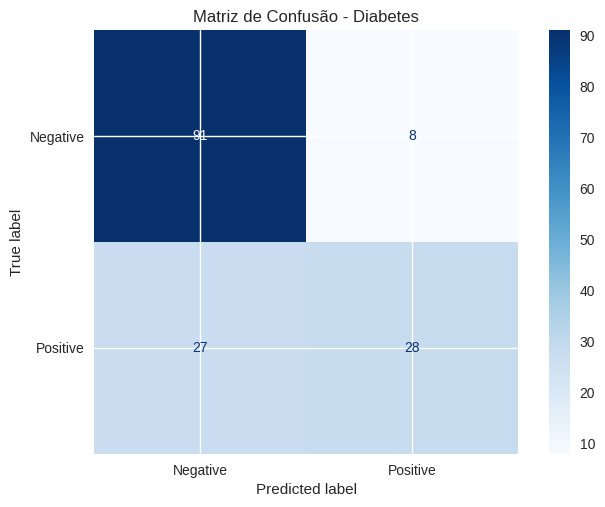

In [35]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, yhat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Diabetes')

[[91  8]
 [27 28]]


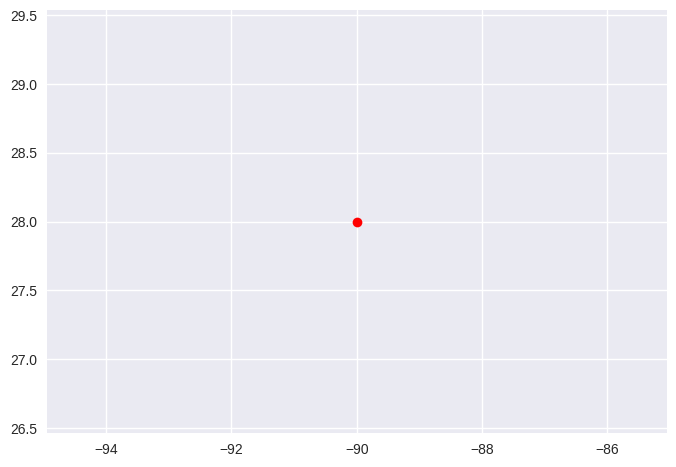

In [36]:
# ROC Curve
plt.plot((1-cm[0][0]), cm[1][1], 'ro')
print(cm)